In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
path ='../data.csv'
df = pd.read_csv(path)
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13292 entries, 0 to 13291
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_name        13273 non-null  object 
 1   year            13281 non-null  object 
 2   price           13281 non-null  object 
 3   assemble_place  13281 non-null  object 
 4   series          13281 non-null  object 
 5   driven kms      13281 non-null  float64
 6   num_of_door     13281 non-null  float64
 7   num_of_seat     13281 non-null  float64
 8   engine_type     13281 non-null  object 
 9   transmission    13281 non-null  object 
 10  url             13281 non-null  object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


,driven kms,num_of_door,num_of_seat
count,1.328100e+04,13281.000000,13281.000000
mean,1.178304e+05,4.523455,5.524509
std,6.116182e+06,0.811390,1.628628
min,1.000000e+00,1.000000,2.000000
25%,2.200000e+04,4.000000,5.000000
50%,4.586900e+04,5.000000,5.000000
75%,7.000000e+04,5.000000,5.000000
max,7.000000e+08,54.000000,47.000000


In [21]:
def describle_data():
    print('Shape of data:\n', df.shape)
    print('--'*20)
    print('Columns of data: \n', df.columns)
    print('--'*20)
    print('Data types of data: \n', df.dtypes)
    print('--'*20)
    print('Missing values of data: \n', df.isnull().sum())
    print('--'*20)
    print('Describe data: \n', df.describe())
    print('--'*20)
    print('Info data: \n', df.info())
describle_data()

Shape of data:
 (13292, 11)
----------------------------------------
Columns of data: 
 Index(['car_name', 'year', 'price', 'assemble_place', 'series', 'driven kms',
       'num_of_door', 'num_of_seat', 'engine_type', 'transmission', 'url'],
      dtype='object')
----------------------------------------
Data types of data: 
 car_name           object
year               object
price              object
assemble_place     object
series             object
driven kms        float64
num_of_door       float64
num_of_seat       float64
engine_type        object
transmission       object
url                object
dtype: object
----------------------------------------
Missing values of data: 
 car_name          19
year              11
price             11
assemble_place    11
series            11
driven kms        11
num_of_door       11
num_of_seat       11
engine_type       11
transmission      11
url               11
dtype: int64
----------------------------------------
Describe data: 
     

In [22]:
# drop duplicate data have same url
df.drop_duplicates(subset=['url'], inplace=True)
describle_data()

Shape of data:
 (11827, 11)
----------------------------------------
Columns of data: 
 Index(['car_name', 'year', 'price', 'assemble_place', 'series', 'driven kms',
       'num_of_door', 'num_of_seat', 'engine_type', 'transmission', 'url'],
      dtype='object')
----------------------------------------
Data types of data: 
 car_name           object
year               object
price              object
assemble_place     object
series             object
driven kms        float64
num_of_door       float64
num_of_seat       float64
engine_type        object
transmission       object
url                object
dtype: object
----------------------------------------
Missing values of data: 
 car_name          18
year               1
price              1
assemble_place     1
series             1
driven kms         1
num_of_door        1
num_of_seat        1
engine_type        1
transmission       1
url                1
dtype: int64
----------------------------------------
Describe data: 
     

In [23]:
def process_year_colum(year):
    if year.isdigit():
        return int(year)
    else:
        return 0
df['year'] = df['year'].astype(str).apply(process_year_colum)
describle_data()

Shape of data:
 (11827, 11)
----------------------------------------
Columns of data: 
 Index(['car_name', 'year', 'price', 'assemble_place', 'series', 'driven kms',
       'num_of_door', 'num_of_seat', 'engine_type', 'transmission', 'url'],
      dtype='object')
----------------------------------------
Data types of data: 
 car_name           object
year                int64
price              object
assemble_place     object
series             object
driven kms        float64
num_of_door       float64
num_of_seat       float64
engine_type        object
transmission       object
url                object
dtype: object
----------------------------------------
Missing values of data: 
 car_name          18
year               0
price              1
assemble_place     1
series             1
driven kms         1
num_of_door        1
num_of_seat        1
engine_type        1
transmission       1
url                1
dtype: int64
----------------------------------------
Describe data: 
     

In [24]:
def process_price(price):
    try:
        if price.find('Tỷ') != -1:
            ty= price.split('Tỷ')[0]
            trieu = price.split('Tỷ')[1]
            trieu = trieu.split('Triệu')[0]
            return float(ty)*1000000000 + float(trieu)*1000000
        elif price.find('Triệu') != -1:
            trieu = price.split('Triệu')[0]
            trieu = trieu.replace(' ','')
            return float(trieu)*1000000
        else:
            print(price)
            return 0
    except:
        print(price)
        return 0
df['price'] = df['price'].astype(str).apply(process_price)

Line 1.6T AWD 
						2022
						
 1 Tỷ
S 1.5 CVT 
						2021
						
X 
						1.9 4X2 AT 
						2019
						
 1 Tỷ
Line Quattro 
						2020
						
 18 Tỷ
Sport 
						2021
						
 11 Tỷ
IVI 2.5 AT 2WD 
						2020
						
Dynamic SE 2.0 
						2019
						
S 1.5 CVT 
						2021
						
Line 2.0G 
						2022
						
 16 Tỷ
 13 Tỷ
 6 Tỷ
IVI 2.5 AT 4WD 
						2020
						
spec 2.5 AT 
						2004
						
Sport 
						2015
						
AWD 
						2011
						
Dynamic SE 2.0 
						2019
						
X 
						2.5 4X2 MT 
						2016
						
Activ 
						2021
						
L 2.4 AT 
						2013
						
Line 2.0G 
						2022
						
Line 
						2021
						
Line 
						2021
						
Activ 
						2019
						
Dynamic 2.0 
						2018
						
Line 
						2022
						
Spec 2.5MT 
						2007
						
Dynamic 2.0 
						2018
						
Line 
						2020
						
Dynamic 2.0 
						2019
						
Line 2.0G 
						2022
						
 2 Tỷ
IVI 2.5 AT 2WD 
						2020
						
Line 2.5 AT 
						2022
						
 39 Tỷ
 2 Tỷ
IVI 2.5 AT 2WD 
						2020
						
Line Quattr

In [25]:
describle_data()

Shape of data:
 (11827, 11)
----------------------------------------
Columns of data: 
 Index(['car_name', 'year', 'price', 'assemble_place', 'series', 'driven kms',
       'num_of_door', 'num_of_seat', 'engine_type', 'transmission', 'url'],
      dtype='object')
----------------------------------------
Data types of data: 
 car_name           object
year                int64
price             float64
assemble_place     object
series             object
driven kms        float64
num_of_door       float64
num_of_seat       float64
engine_type        object
transmission       object
url                object
dtype: object
----------------------------------------
Missing values of data: 
 car_name          18
year               0
price              0
assemble_place     1
series             1
driven kms         1
num_of_door        1
num_of_seat        1
engine_type        1
transmission       1
url                1
dtype: int64
----------------------------------------
Describe data: 
     

In [26]:
df['year'].value_counts()
# if year <= 1900 then replace by mean of year
df['year'] = df['year'].apply(lambda x: df['year'].mean() if x <= 1900 else x)


<Axes: title={'center': 'Average car price by Year'}, xlabel='year'>

<Figure size 1000x1000 with 0 Axes>

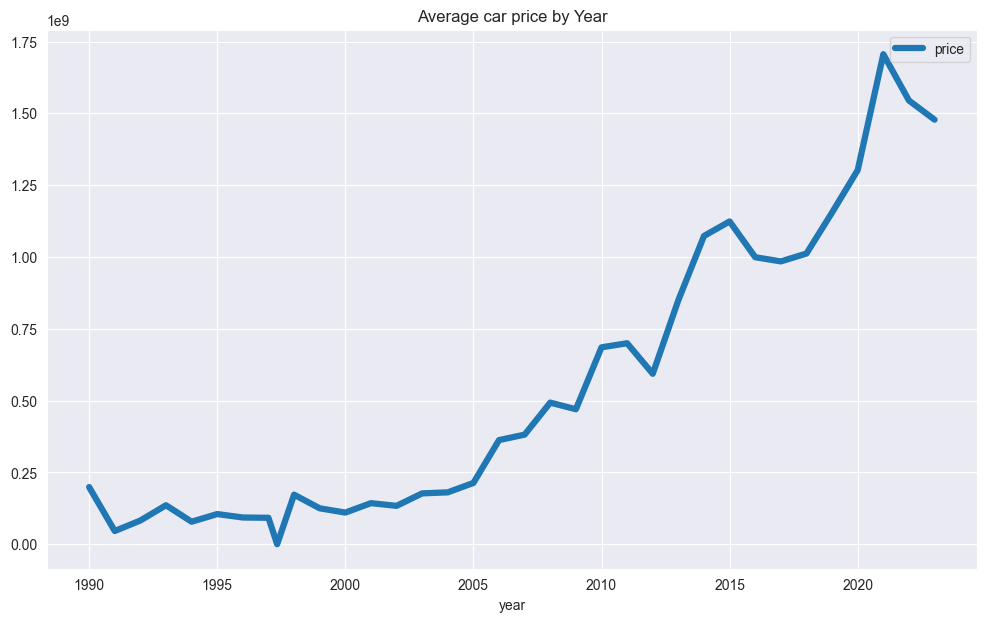

In [28]:
plt.figure(figsize=(10,10))
#plot price by year
pv1=pd.pivot_table(df, index=['year'],values = ['price'],aggfunc = 'mean')
pv1.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by Year')


In [35]:
df['driven kms'].value_counts()
df['driven kms'].describe()

count    1.182600e+04
mean     1.252095e+05
std      6.481312e+06
min      1.000000e+00
25%      2.200000e+04
50%      4.500000e+04
75%      7.000000e+04
max      7.000000e+08
Name: driven kms, dtype: float64

<Axes: title={'center': 'Average car price by driven km'}, xlabel='driven kms'>

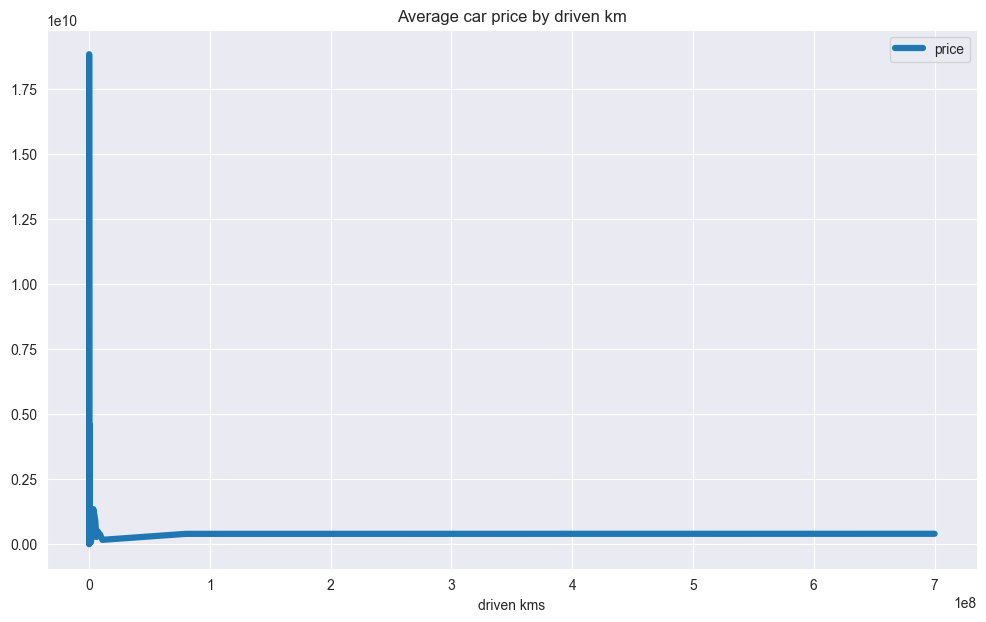

In [30]:
#plot price by driven km
pv2=pd.pivot_table(df, index=['driven kms'],values = ['price'],aggfunc = 'mean')
pv2.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by driven km')
